In [1]:
import pandas as pd
import os
import ast

In [2]:
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')  # Use a base style

# Customize parameters
plt.rcParams['font.family'] = 'serif'  # Use serif fonts
plt.rcParams['font.serif'] = ['Times New Roman']  # Specify the font
plt.rcParams['font.size'] = 12  # Base font size

In [4]:
start_path = 'Experiment Results/Symmetrical MLP/Seeds_Batches'
files = os.listdir(start_path)

In [5]:
# Initialize an empty list to store DataFrames
dataframes = []
es_dfs = []

for file_ in files:
    file_path = os.path.join(start_path, file_)

    if 'OE' not in file_path:
        raw_df = pd.read_csv(file_path)
        
        # Create the 'ID' column
        raw_df['ID'] += '_' + raw_df['Seed'].astype(str) + '_' + raw_df['Batch Size'].astype(str)
        
        if 'ES' in file_path:
            # Convert the 'epoch' column from string to list
            raw_df['epoch'] = raw_df['epoch'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            # Extract the last element from the 'epoch' list
            raw_df['n_epochs'] = raw_df['epoch'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)
        else:
            # Extract n_epochs from the filename
            n_epochs = str(file_.split('E_')[0])
            raw_df['n_epochs'] = n_epochs
        
        # Append the processed DataFrame to the list
        dataframes.append(raw_df)


# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
final_df['n_epochs'] = final_df['n_epochs'].astype('int32')
oe_df = final_df[final_df['Strategy'] == 'OE']
final_df



,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy,train_val_time,Strategy,Seed,Batch Size,n_epochs,epoch,LC_Train_Loss,LC_Train_Acc,LC_Val_Loss,LC_Val_Acc
0,1_[50]_0.001_13_1024,1,[50],0.00100,1.330482,0.540075,1.462635,0.4928,1.471116,0.4871,3.004000,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
1,1_[50]_0.0001_13_1024,1,[50],0.00010,1.588698,0.451275,1.608950,0.4404,1.604810,0.4430,3.320890,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
2,1_[50]_1e-05_13_1024,1,[50],0.00001,1.956308,0.336050,1.940590,0.3427,1.942770,0.3464,4.705431,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
3,1_[200]_0.001_13_1024,1,[200],0.00100,1.126868,0.612325,1.406803,0.5140,1.414848,0.5115,4.746408,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
4,1_[200]_0.0001_13_1024,1,[200],0.00010,1.421591,0.514175,1.481985,0.4802,1.480462,0.4858,4.827174,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,4_[200 200 200 200]_0.0001_777_512,4,[200 200 200 200],0.00010,1.129023,0.602275,1.372815,0.5196,1.369311,0.5252,28.432232,ES,777,512,67,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.069704417037964, 1.7436405181884767, 1.6257...","[0.258475, 0.3804, 0.4232, 0.45125, 0.4736, 0....","[1.8176351879119874, 1.6587655630111695, 1.594...","[0.3525, 0.4059, 0.4347, 0.4534, 0.4643, 0.476..."
7556,4_[200 200 200 200]_1e-05_777_512,4,[200 200 200 200],0.00001,1.096333,0.614900,1.381014,0.5168,1.383591,0.5171,84.210292,ES,777,512,199,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.291218621444702, 2.246390935897827, 2.16334...","[0.1148, 0.216725, 0.246025, 0.262925, 0.29247...","[2.274005066680908, 2.2057339767456057, 2.1121...","[0.1682, 0.242, 0.2577, 0.2839, 0.307, 0.3324,..."
7557,4_[1000 1000 1000 1000]_0.001_777_512,4,[1000 1000 1000 1000],0.00100,1.094957,0.607475,1.384056,0.5239,1.402724,0.5234,34.821422,ES,777,512,56,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7664140811920166, 1.5200096704483033, 1.383...","[0.363075, 0.460625, 0.5088, 0.544225, 0.57575...","[1.6541541059494018, 1.5001461696624756, 1.488...","[0.4191, 0.4669, 0.4872, 0.5173, 0.5247, 0.523..."
7558,4_[1000 1000 1000 1000]_0.0001_777_512,4,[1000 1000 1000 1000],0.00010,1.104053,0.614250,1.336635,0.5370,1.346080,0.5338,35.522966,ES,777,512,57,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.8578391366958618, 1.557549924468994, 1.4305...","[0.339775, 0.4481, 0.4964, 0.5289, 0.5579, 0.5...","[1.6361226350784301, 1.518427812576294, 1.4473...","[0.4197, 0.4631, 0.4885, 0.5044, 0.5167, 0.524..."


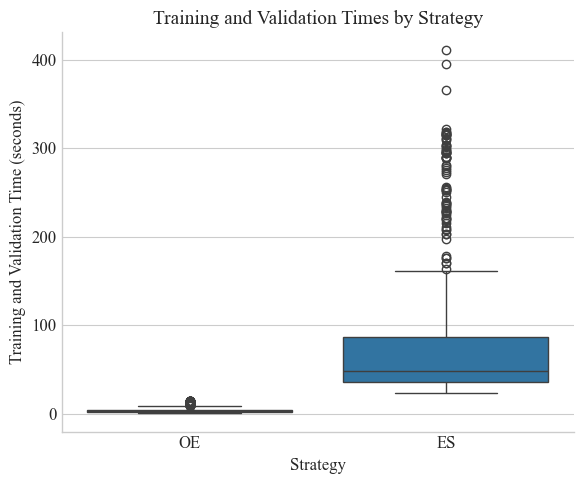

In [6]:
# sns.set_palette("gray")
plt.figure(figsize=(6, 5))
sns.boxplot(x='Strategy', y='train_val_time', data=final_df)

# Add titles and labels
plt.title('Training and Validation Times by Strategy', fontsize=14)
plt.xlabel('Strategy', fontsize=12)
plt.ylabel('Training and Validation Time (seconds)', fontsize=12)

sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
es_df = final_df[final_df['Strategy'] == 'ES']
n_epochs_tested = final_df[final_df['Strategy'] == 'OE']['n_epochs'].unique().tolist()
n_epochs_tested = sorted(n_epochs_tested, key=int)
n_epochs_tested

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

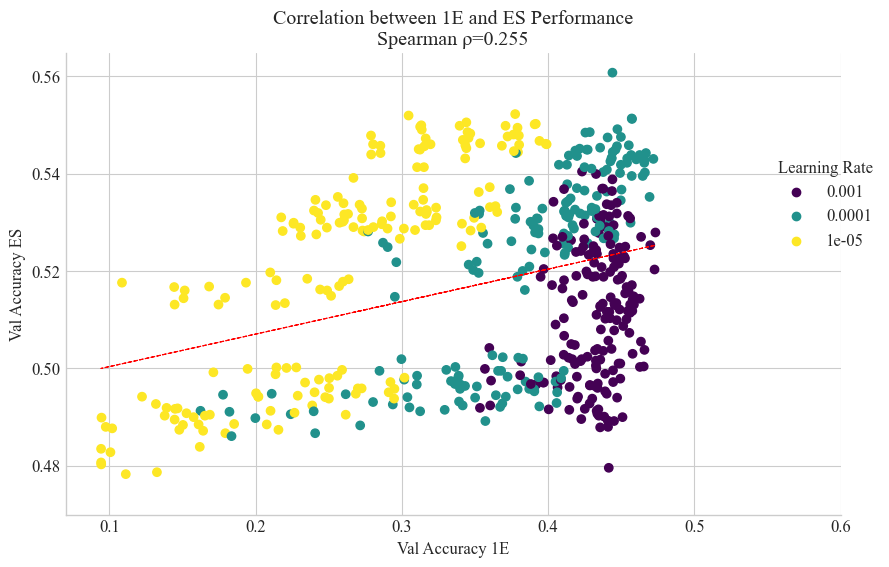

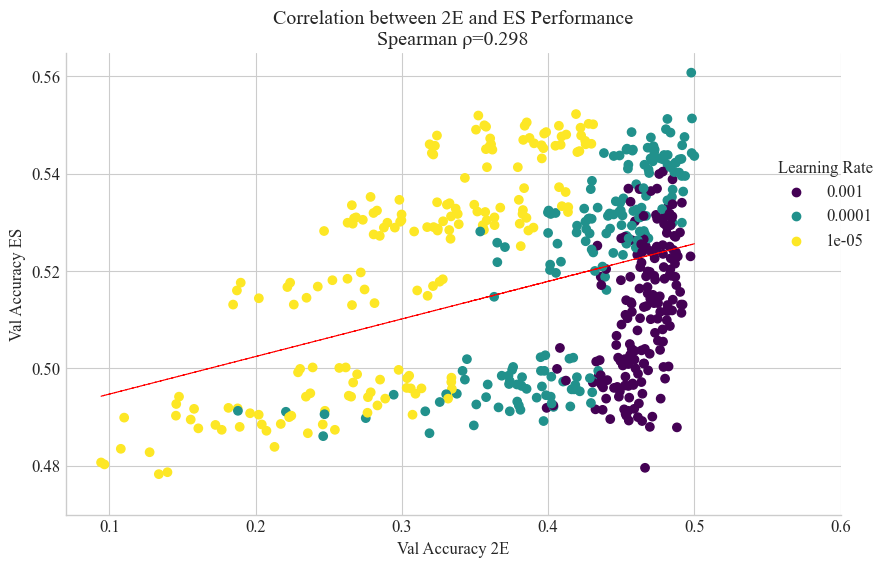

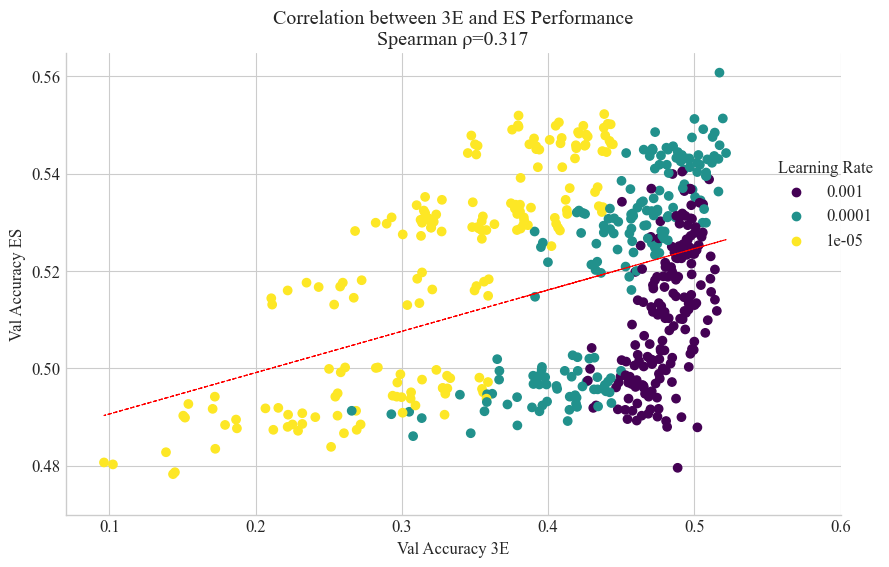

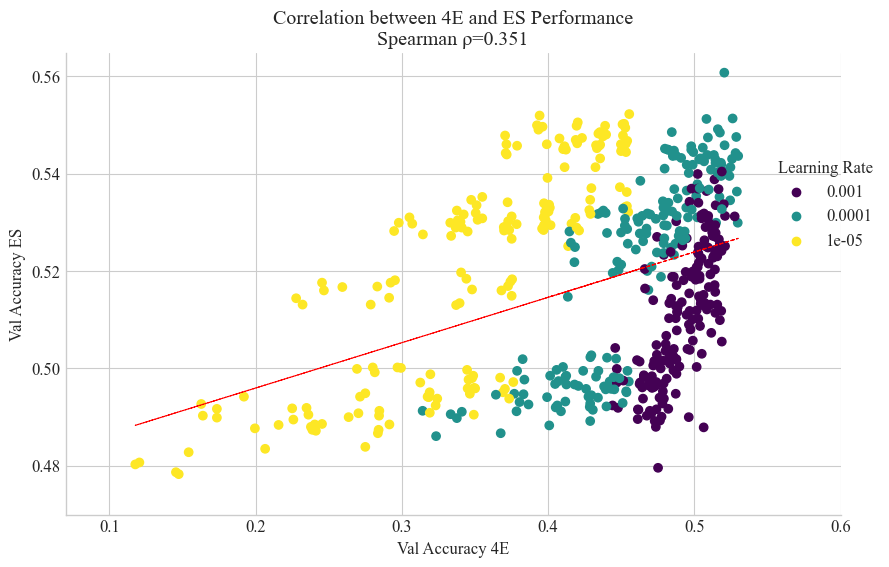

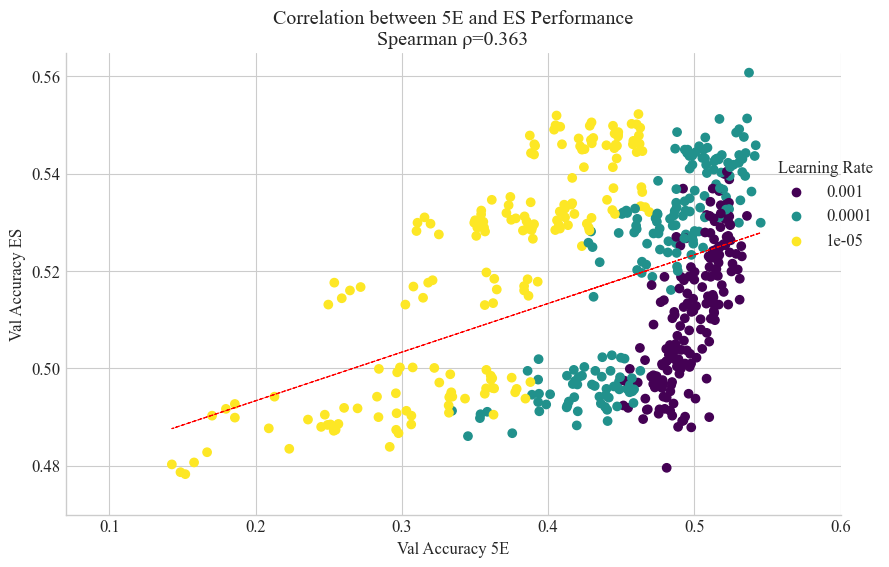

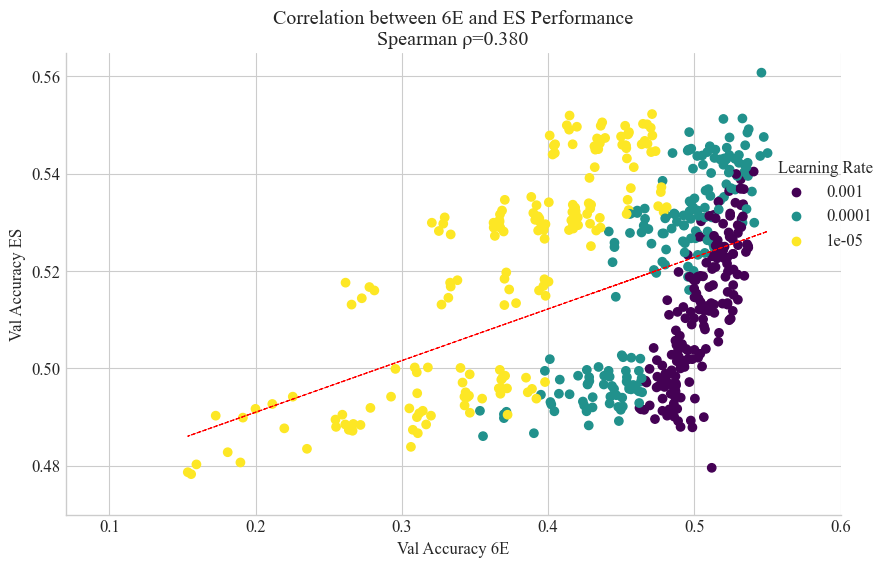

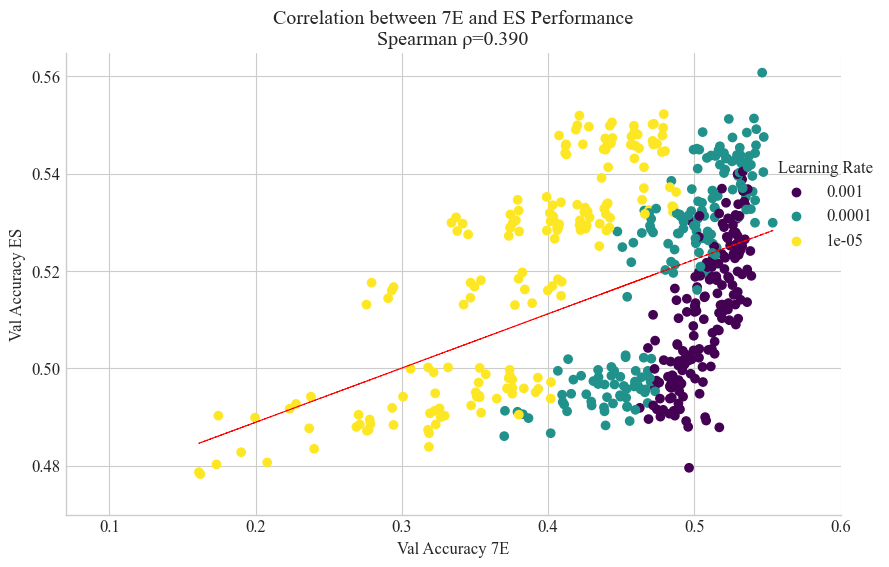

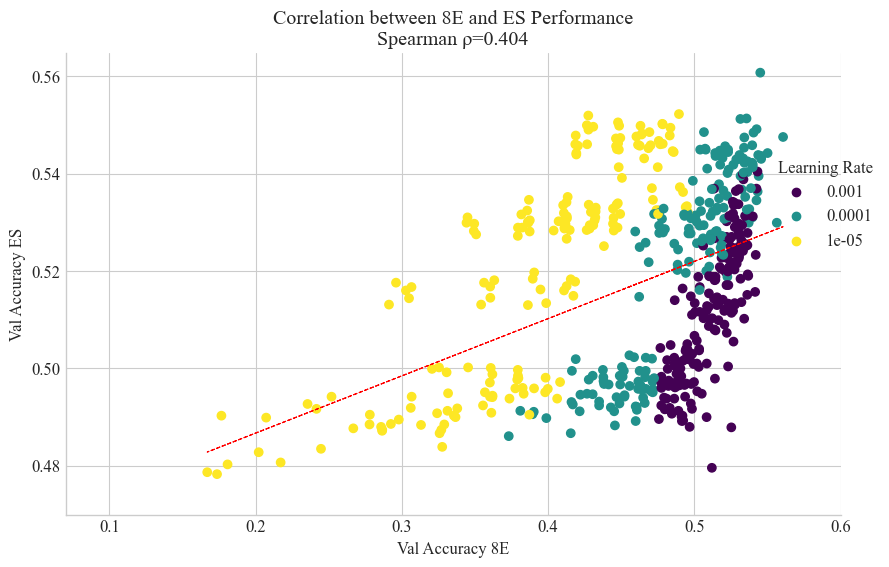

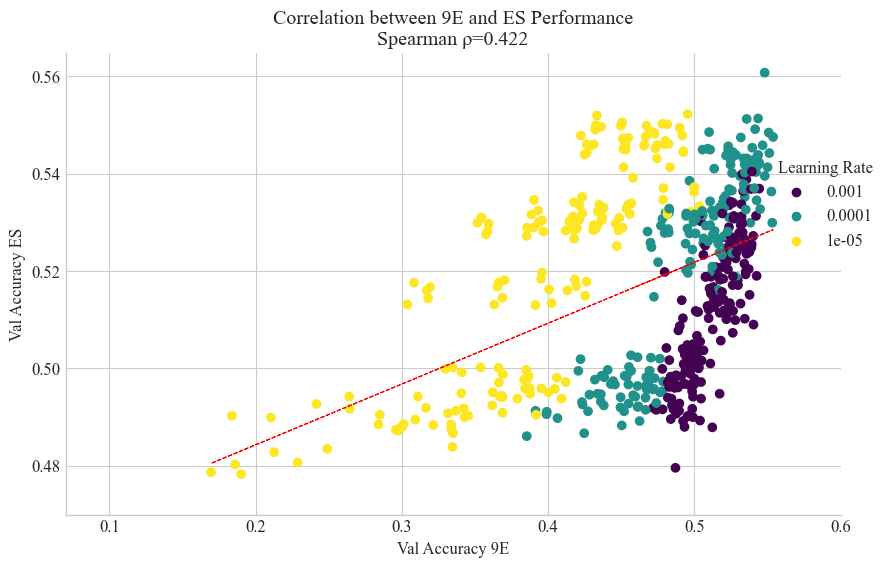

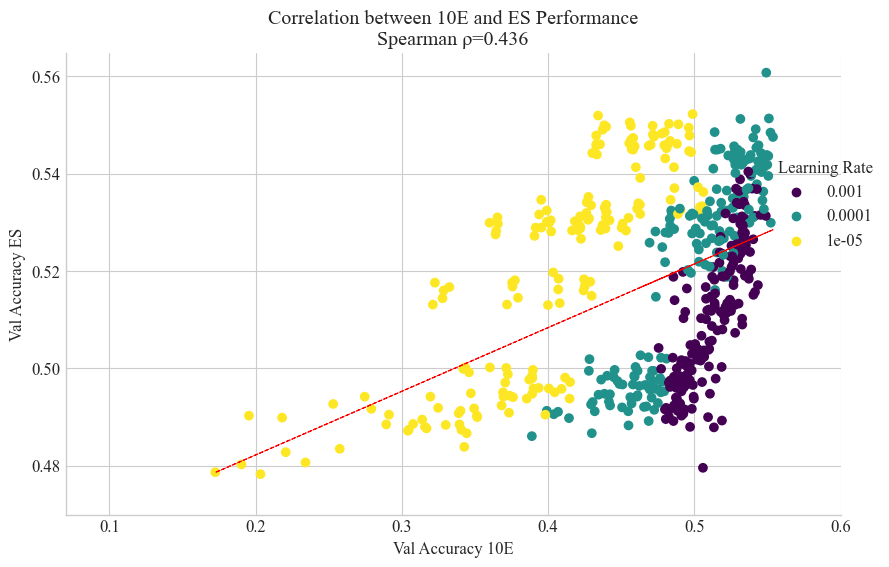

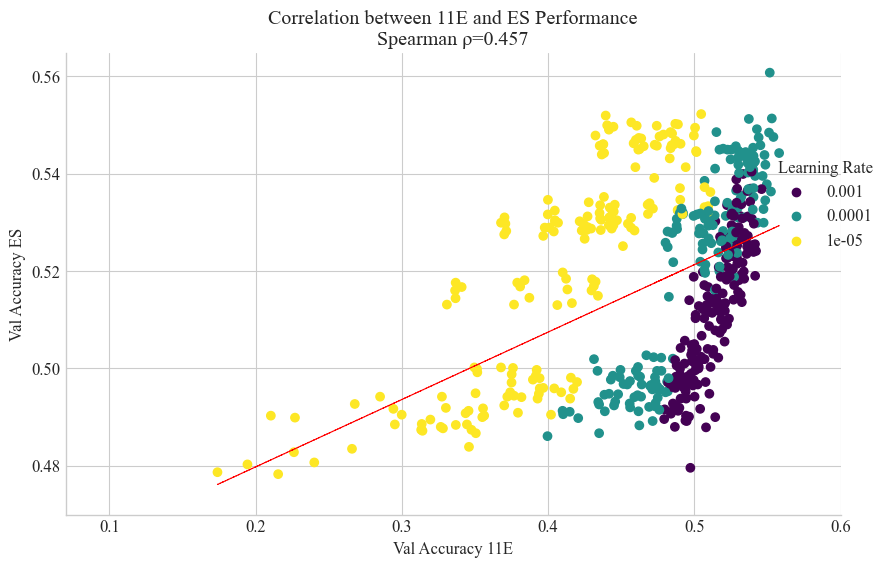

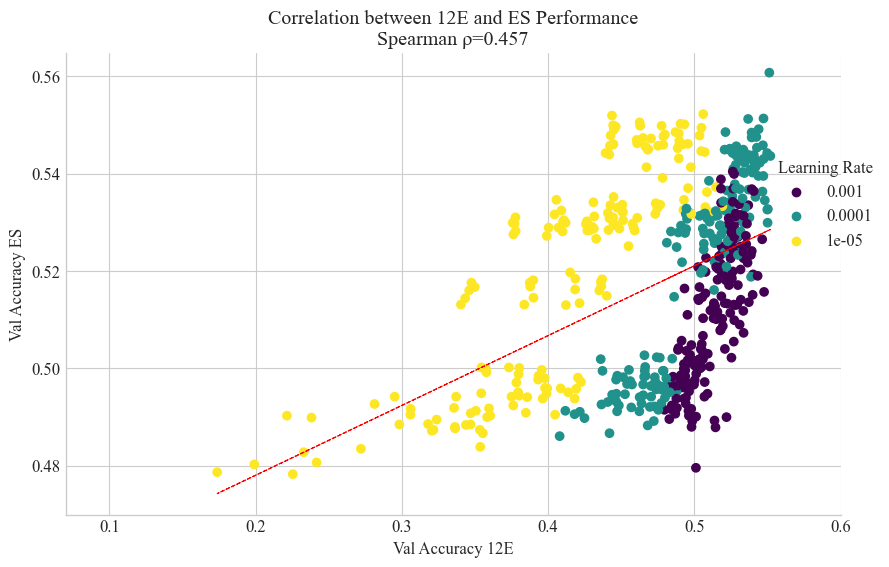

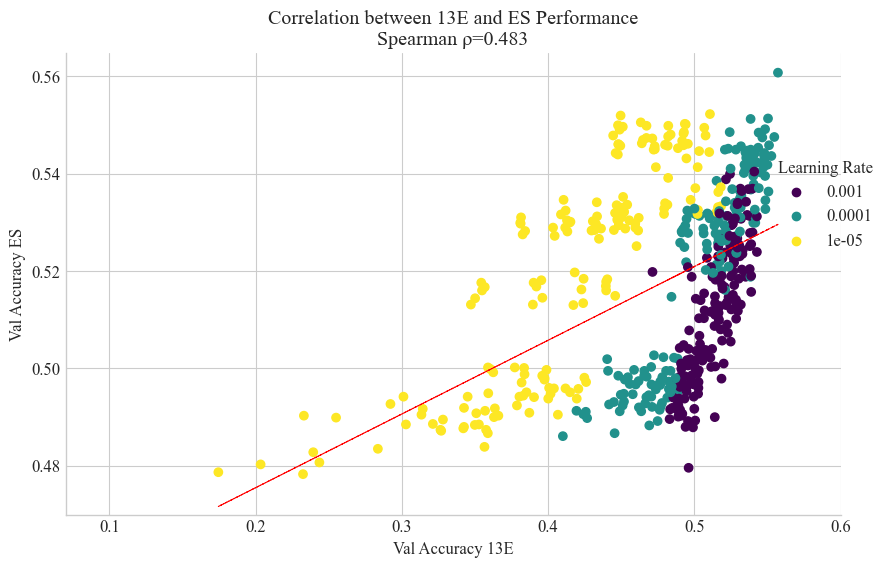

In [8]:
spearman_rhos = {
    'Correlation': [],
    'P_values': []
}

kendall_thaus = {
    'Correlation': [],
    'P_values': []
}

metric = 'val_accuracy'

for epoch_tested in n_epochs_tested:
    epoch_df = final_df[final_df['n_epochs'] == epoch_tested]
    suffix_A = 'ES' 
    suffix_B = str(epoch_tested) + 'E' 
    suffixes = (suffix_A, suffix_B)

    results = pd.merge(left=es_df, right=epoch_df[[metric, 'ID']], how='inner', on='ID', suffixes=suffixes)
    
    var_to_group = 'learning_rate'
    unique_groupings = results['learning_rate'].unique()

    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groupings)))
    # Create a mapping
    color_map = {value: colors[i] for i, value in enumerate(unique_groupings)}

    # Map the learning rates in the DataFrame to their corresponding colors
    point_colors = results['learning_rate'].map(color_map)

    spearman_corr, spearman_p = spearmanr(results[f'{metric}{suffixes[0]}'], results[f'{metric}{suffixes[1]}'])
    kendall_corr, kendall_p = kendalltau(results[f'{metric}{suffixes[0]}'], results[f'{metric}{suffixes[1]}'])

    spearman_rhos['Correlation'].append(spearman_corr)
    spearman_rhos['P_values'].append(spearman_p)
    
    kendall_thaus['Correlation'].append(kendall_corr)
    kendall_thaus['P_values'].append(kendall_p)

    plt.figure(figsize=(10, 6))
    plt.scatter(
    results[f'{metric}{suffixes[1]}'], 
    results[f'{metric}{suffixes[0]}'], 
    c=point_colors  # Use the mapped colors
)
    plt.xlabel(f'{metric.replace("_", " ").title()} {suffixes[1]}')
    plt.ylabel(f'{metric.replace("_", " ").title()} {suffixes[0]}')
    plt.title(f'Correlation between {suffixes[1]} and {suffixes[0]} Performance\nSpearman \u03c1={spearman_corr:.3f}')
    plt.xlim(0.07, 0.6)
    plt.ylim(0.47)

    z = np.polyfit(results[f'{metric}{suffixes[1]}'], results[f'{metric}{suffixes[0]}'], 1)
    p = np.poly1d(z)
    plt.plot(results[f'{metric}{suffixes[1]}'], p(results[f'{metric}{suffixes[1]}']), "r--", lw=0.8)
    sns.despine()

    # Create a legend
    for value, color in color_map.items():
        plt.scatter([], [], color=color, label=value)  # Create empty scatter points for legend

    plt.legend(title='Learning Rate', bbox_to_anchor=(0.9, 0.8), loc='upper left')
    
    # Export fig
    plt.savefig(f'Correlation_bw_{suffix_A}-{suffix_B}.png')
    plt.show()


# Build GIF

In [9]:
from PIL import Image
images = [file_ for file_ in os.listdir() if file_.endswith('.png')]
# List of image file paths
print(images)

# Open images and store them in a list
frames = [Image.open(image) for image in images]

# Save frames as an animated GIF
frames[0].save(
    'Correlation BW Epochs and ES-by_NLayers.gif',
    save_all=True,
    append_images=frames[1:],
    duration=300,
    loop=0
)


['Correlation_bw_ES-10E.png', 'Correlation_bw_ES-11E.png', 'Correlation_bw_ES-12E.png', 'Correlation_bw_ES-13E.png', 'Correlation_bw_ES-1E.png', 'Correlation_bw_ES-2E.png', 'Correlation_bw_ES-3E.png', 'Correlation_bw_ES-4E.png', 'Correlation_bw_ES-5E.png', 'Correlation_bw_ES-6E.png', 'Correlation_bw_ES-7E.png', 'Correlation_bw_ES-8E.png', 'Correlation_bw_ES-9E.png']


# Plot LC for ES

In [10]:
def process_architecture_results(df, metric):
    """
    Creates unique IDs for neural network architectures and ranks them by a specified metric.
    """
    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()

    # Sort by metric score
    result_df = result_df.sort_values(by=metric, ascending=False).reset_index(drop=True)
    
    # Add ranking
    result_df['Ranking'] = result_df.index + 1
    
    return result_df

def str_to_array(string_):
    clean_string = string_.replace("[", "").replace("]", "").strip() 
    _array = np.fromstring(clean_string, sep=' ').reshape((10, 10))
    _array = _array.astype(int)
    return _array


def plot_learning_curve(curve, ax, label="Learning Curve", color_index=0.5):
    """
    Plots a learning curve on a given axis with a 'magma' aesthetic.
    
    Parameters:
        curve (list or np.array): The learning curve values.
        ax (matplotlib.axes.Axes): The axis to plot on.
        label (str): The label for the curve.
        color_index (float): Position in the colormap (0 to 1) to vary the color.
    """
    sns.set_style("darkgrid")
    color = plt.cm.coolwarm(color_index)
    extended_curve = np.insert(curve, 0, 0)  # Add 0 at the beginning
    x_values = np.arange(len(extended_curve))  # Create x-values starting from 0
    
    ax.plot(x_values, extended_curve, color=color, linewidth=1, alpha=0.1)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss / Accuracy")
    # ax.legend()
    

In [11]:
lc_to_test = 'LC_Val_Acc'
es_ranked = process_architecture_results(es_df, metric='val_accuracy').head(100)

es_ranked['LC_Train_Acc'] = es_ranked['LC_Train_Acc'].apply(ast.literal_eval)
es_ranked['LC_Val_Acc'] = es_ranked['LC_Val_Acc'].apply(ast.literal_eval)

In [12]:
es_ranked

,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy,...,Strategy,Seed,Batch Size,n_epochs,epoch,LC_Train_Loss,LC_Train_Acc,LC_Val_Loss,LC_Val_Acc,Ranking
0,4_[1000 1000 1000 1000]_0.0001_42_128,4,[1000 1000 1000 1000],0.00010,0.903347,0.685900,1.313831,0.5607,1.311843,0.5553,...,ES,42,128,57,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7100361820220946, 1.4496678493499755, 1.314...","[0.391975, 0.4893, 0.5355, 0.575725, 0.609775,...","[1.5418095153808593, 1.4238820569992066, 1.383...","[0.444, 0.499, 0.5163, 0.5362, 0.5314, 0.5387,...",1
1,2_[1000 1000]_1e-05_777_128,2,[1000 1000],0.00001,0.874469,0.718225,1.306598,0.5522,1.327482,0.5353,...,ES,777,128,91,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.9873513715744018, 1.7311709045410155, 1.631...","[0.3083, 0.39665, 0.433775, 0.4541, 0.471425, ...","[1.796328614807129, 1.6701629819869994, 1.6047...","[0.3775, 0.417, 0.4367, 0.4508, 0.4627, 0.4738...",2
2,1_[1000]_1e-05_42_1024,1,[1000],0.00001,0.829173,0.753750,1.305913,0.5519,1.316882,0.5377,...,ES,42,1024,317,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.160037154388428, 1.95143837890625, 1.857190...","[0.22855, 0.330525, 0.364925, 0.3868, 0.40165,...","[2.0124769592285157, 1.888897144317627, 1.8177...","[0.3046, 0.3522, 0.3777, 0.3934, 0.4054, 0.412...",3
3,2_[1000 1000]_0.0001_1337_128,2,[1000 1000],0.00010,0.910415,0.689275,1.319161,0.5513,1.333613,0.5420,...,ES,1337,128,58,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.674673514175415, 1.4335529781341552, 1.3138...","[0.409825, 0.4981, 0.541425, 0.574475, 0.60612...","[1.5256495822906495, 1.4218319402694701, 1.378...","[0.4572, 0.5025, 0.5136, 0.5253, 0.5361, 0.534...",4
4,1_[1000]_0.0001_2024_256,1,[1000],0.00010,0.882123,0.715550,1.317870,0.5512,1.332693,0.5397,...,ES,2024,256,65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7009717094421386, 1.4939293893814087, 1.400...","[0.4051, 0.484625, 0.5181, 0.5457, 0.5676, 0.5...","[1.5507064083099364, 1.4826867664337158, 1.437...","[0.4574, 0.486, 0.4994, 0.5034, 0.5185, 0.5175...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4_[1000 1000 1000 1000]_0.001_777_128,4,[1000 1000 1000 1000],0.00100,1.058635,0.617700,1.367573,0.5369,1.397921,0.5254,...,ES,777,128,57,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7415727836608887, 1.51796672000885, 1.39537...","[0.3763, 0.463225, 0.50425, 0.5319, 0.56365, 0...","[1.6022625005722047, 1.4748062450408936, 1.478...","[0.4377, 0.4711, 0.4784, 0.5035, 0.5185, 0.524...",96
96,4_[1000 1000 1000 1000]_0.0001_777_1024,4,[1000 1000 1000 1000],0.00010,1.000343,0.650025,1.351884,0.5368,1.366522,0.5296,...,ES,777,1024,62,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.9743568157196045, 1.661243377494812, 1.5400...","[0.3047, 0.410275, 0.45635, 0.487325, 0.514425...","[1.7428744184494018, 1.5970583219528198, 1.513...","[0.3739, 0.4305, 0.4618, 0.4661, 0.4925, 0.503...",97
97,4_[1000 1000 1000 1000]_0.001_42_512,4,[1000 1000 1000 1000],0.00100,0.983367,0.645700,1.375898,0.5368,1.391611,0.5267,...,ES,42,512,57,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.754892275428772, 1.506130104446411, 1.37255...","[0.3719, 0.466675, 0.514475, 0.5427, 0.580025,...","[1.6315747024536134, 1.5024999404907227, 1.474...","[0.4109, 0.4746, 0.484, 0.5089, 0.5131, 0.5275...",98
98,1_[1000]_0.0001_42_256,1,[1000],0.00010,0.977237,0.677900,1.333739,0.5367,1.346218,0.5324,...,ES,42,256,62,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7040933639526368, 1.4938841365814208, 1.400...","[0.40505, 0.48385, 0.519575, 0.546625, 0.56877...","[1.5754712644577027, 1.4877032299041748, 1.435...","[0.4502, 0.481, 0.4981, 0.5088, 0.5147, 0.5221...",99


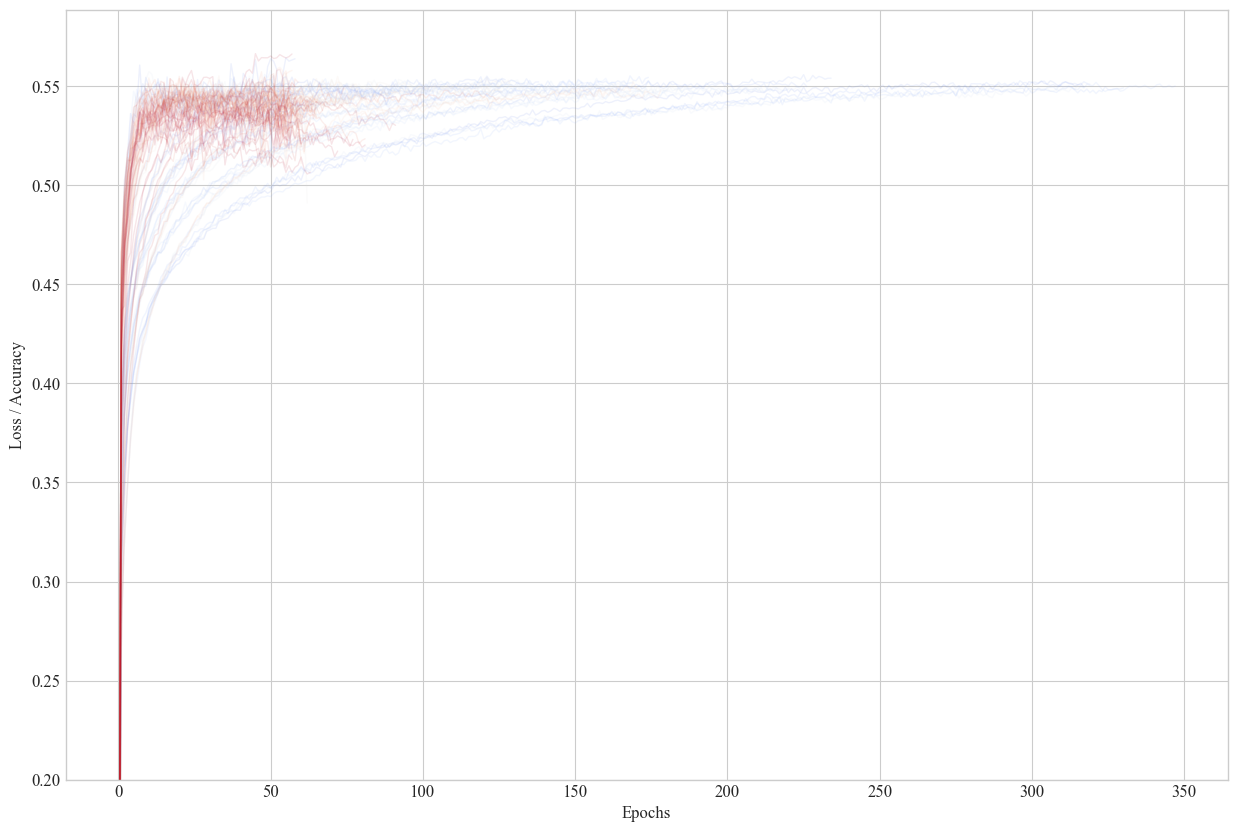

In [13]:
fig, ax = plt.subplots(1, figsize=(15,10))
for i in range(len(es_ranked)):
    # plot_learning_curve(es_ranked['LC_Train_Acc'][i], 
    #                     ax=ax, label=f'Training_Acc {i}', color_index=0.1 + i * 0.1)
    plot_learning_curve(es_ranked[lc_to_test][i], 
                        ax=ax, label=f'Val_Acc {i}', 
                        color_index=0.1 + i * 0.01)
    # plt.xlim(0,10)
    plt.ylim(0.2)
plt.show()

In [14]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [15]:
es_ranked[lc_to_test][i]

[0.4249,
 0.4634,
 0.4821,
 0.4929,
 0.5047,
 0.5101,
 0.5137,
 0.5117,
 0.5175,
 0.5249,
 0.5227,
 0.5253,
 0.5365,
 0.5302,
 0.5319,
 0.5331,
 0.5319,
 0.5365,
 0.5335,
 0.5333,
 0.5327,
 0.5362,
 0.5331,
 0.5349,
 0.5338,
 0.5349,
 0.5311,
 0.5324,
 0.5308,
 0.529,
 0.5286,
 0.5302,
 0.5292,
 0.5283,
 0.5189,
 0.5241,
 0.5244,
 0.5238,
 0.5221,
 0.522,
 0.5218,
 0.5158,
 0.5181,
 0.5174,
 0.5176,
 0.5187,
 0.5112,
 0.5147,
 0.5173,
 0.5161,
 0.5141,
 0.5127,
 0.5113,
 0.5118,
 0.5066,
 0.5099,
 0.5065,
 0.5091,
 0.5102,
 0.5143,
 0.5081,
 0.5057,
 0.5066]

# Ranked Analysis

In [16]:
oe_ranked = process_architecture_results(oe_df[oe_df['n_epochs'] == 1], metric='val_accuracy')
es_ranked = process_architecture_results(es_df, metric='val_accuracy')


In [17]:
# Check the top elements in the ES and compare with OS
def get_top_models_overlap(df1, df2, id_column='ID', score_column='val_accuracy', top_n=5):
    """
    Find how many models appear in the top N of both dataframes.
    """
    # Get top N models from each dataframe
    top_df1 = df1.nlargest(top_n, score_column)
    top_df2 = df2.nlargest(top_n, score_column)
    
    # Get the IDs of models in the top N
    top_ids_df1 = set(top_df1[id_column])
    top_ids_df2 = set(top_df2[id_column])
    
    # Find common IDs
    common_ids = top_ids_df1.intersection(top_ids_df2)
    
    # Get models from df1 that are in top N of df2
    df1_in_top_of_df2 = df1[df1[id_column].isin(top_ids_df2)]
    
    # Get models from df2 that are in top N of df1
    df2_in_top_of_df1 = df2[df2[id_column].isin(top_ids_df1)]
    
    return {
        'count': len(common_ids),
        'common_ids': common_ids,
        'df1_in_df2': df1_in_top_of_df2,
        'df2_in_df1': df2_in_top_of_df1
    }